In [50]:
import csv
import emoji
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd


%matplotlib inline

In [14]:
def read_csv(filename):
    phrase = []
    emoji = []

    with open(filename) as emoji_data:
        csvReader = csv.reader(emoji_data)
        for row in csvReader:
            phrase.append(row[0])
            emoji.append(row[1])

    X = np.asarray(phrase)
    Y = np.asarray(emoji, dtype=int)
    return X, Y

In [15]:
X_train, Y_train = read_csv('./dataset/train_emoji.csv')
X_test, Y_test = read_csv('./dataset/test_emoji.csv')

In [16]:
emoji_dictionary = {
    "0": ":heart_with_arrow:",
    "1": ":baseball:",
    "2": ":smile:",
    "3": ":disappointed:",
    "4": ":fork_and_knife:"
}

def label_to_emoji(label):
    return emoji.emojize(emoji_dictionary[str(label)],  language='alias')

In [17]:
for idx in range(10):
    print(X_train[idx], label_to_emoji(Y_train[idx]))

never talk to me again 😞
I am proud of your achievements 😄
It is the worst day in my life 😞
Miss you so much 💘
food is life 🍴
I love you mum 💘
Stop saying bullshit 😞
congratulations on your acceptance 😄
The assignment is too long  😞
I want to go play ⚾


In [18]:
def read_glove_vecs(filename):
    with open(filename, 'r') as f:
        words = set()
        word_to_vec_map = {}
        for line in f:
            line = line.strip().split()
            curr_word = line[0]
            words.add(curr_word)
            word_to_vec_map[curr_word] = np.array(line[1:], dtype=np.float64)
        
        i = 1
        words_to_index = {}
        index_to_words = {}
        for w in sorted(words):
            words_to_index[w] = i
            index_to_words[i] = w
            i = i + 1
    return words_to_index, index_to_words, word_to_vec_map

In [29]:
word_to_index, index_to_word, word_to_vec_map = read_glove_vecs('../../datasets/glove.6B.50d.txt')

In [30]:
def embed_sentences(sentence):
    counter = 0
    words = sentence.lower().split()
    embedding = np.zeros((50,))
    for w in words:
        if w in list(word_to_vec_map.keys()):
            counter += 1
            embedding += word_to_vec_map[w]
    if counter > 0:
        embedding /= counter
    return embedding

In [37]:
X_train_embed = np.array([embed_sentences(x) for x in X_train])
X_test_embed = np.array([embed_sentences(x) for x in X_test])

X_train_embed.shape, Y_train.shape

((132, 50), (132,))

In [56]:
emoji_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(50,), activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

emoji_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = emoji_model.fit(X_train_embed, Y_train, epochs=100, batch_size=32, shuffle=True, validation_data=(X_test_embed, Y_test), verbose=1)


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1873 - loss: 1.6344 - val_accuracy: 0.3393 - val_loss: 1.5474
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3181 - loss: 1.5158 - val_accuracy: 0.3036 - val_loss: 1.5000
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4154 - loss: 1.4640 - val_accuracy: 0.3571 - val_loss: 1.4637
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4258 - loss: 1.4066 - val_accuracy: 0.3929 - val_loss: 1.4271
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4473 - loss: 1.3744 - val_accuracy: 0.4286 - val_loss: 1.3976
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4962 - loss: 1.3209 - val_accuracy: 0.3929 - val_loss: 1.3760
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5025 - loss: 1.2692 - val_accuracy: 0.4286 - val_loss: 1.3656
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5669 - loss: 1.2311 - val_accuracy: 0.4107 - val_loss: 1.3561

In [57]:
emoji_model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                │ (None, 128)            │         6,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,329 (177.07 KB)

 Trainable params: 15,109 (59.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,220 (118.05 KB)

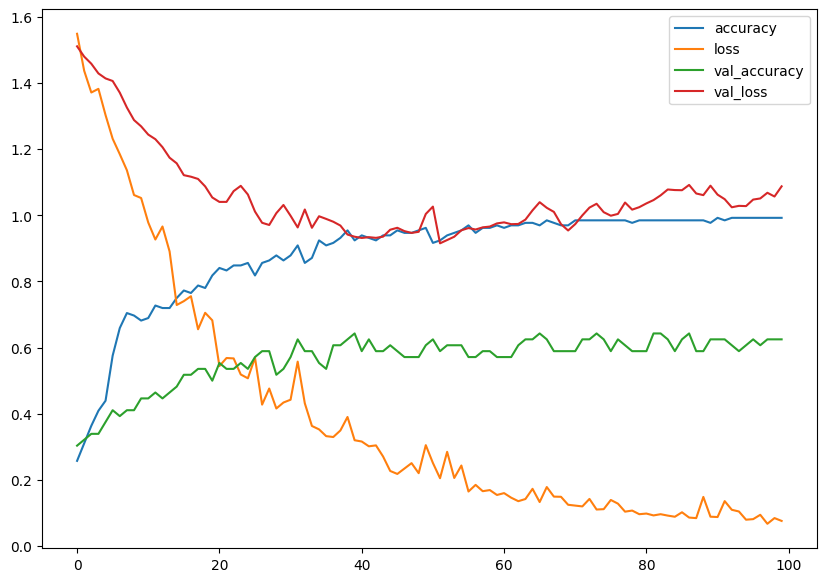

In [52]:
history_dict = history.history
graph = pd.DataFrame(history_dict).plot(figsize=(10, 7))
